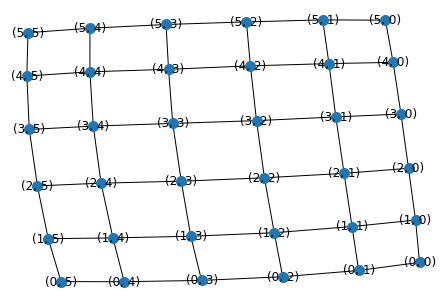

In [34]:
import networkx as nx

G1 = nx.Graph()
G1.add_nodes_from([0, 1, 2, 3])
G1.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
#nx.draw(G1, with_labels=True, alpha=0.8, node_size=500)
G = nx.grid_graph([6,6], periodic=False)
nx.draw(G, with_labels=True, alpha=1, node_size=100)

In [37]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter
import numpy as np

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = 36

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
 
np.count_nonzero(np.array(adjacency))
qc_mix.draw()

┌───────────────┐
 q_0: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_1: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_2: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_3: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_4: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_5: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_6: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_7: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_8: ┤ RX(2*$\beta$) ├
      ├───────────────┤
 q_9: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_10: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_11: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_12: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_13: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_14: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_15: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_16: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_17: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_18: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_19: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_20: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_21: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_22: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_23: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_24: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_25: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_26: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_27: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_28: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_29: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_30: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_31: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_32: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_33: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_34: ┤ RX(2*$\beta$) ├
      ├───────────────┤
q_35: ┤ RX(2*$\beta$) ├
      └───────────────┘

In [76]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)

def enumerate_nodes(nodes):
    return 6*nodes[0]+nodes[1]

J = [[]]
h = []

print (enumerate_nodes(np.array(G.nodes())[20]))

for pair in list(G.edges()):  # pairs of nodes
    a = enumerate_nodes(pair[0]),
    b = enumerate_nodes(pair[1]),
    qc_p.rzz(2*gamma, a, b) #*J[pair[0],pair[1]]
    
for node in range(nqubits):
    qc_p.rz(2*gamma, node) #*h
    
qc_p.draw()

20


┌────────────────┐                 »
 q_0: ─■────────────────■───────────────┤ RZ(2*$\gamma$) ├─────────────────»
       │                │ZZ(2*$\gamma$) └────────────────┘                 »
 q_1: ─┼────────────────■────────────────■─────────────────■───────────────»
       │                                 │                 │ZZ(2*$\gamma$) »
 q_2: ─┼─────────────────────────────────┼─────────────────■───────────────»
       │                                 │                                 »
 q_3: ─┼─────────────────────────────────┼─────────────────────────────────»
       │                                 │                                 »
 q_4: ─┼─────────────────────────────────┼─────────────────────────────────»
       │                                 │                                 »
 q_5: ─┼─────────────────────────────────┼─────────────────────────────────»
       │ZZ(2*$\gamma$)                   │                                 »
 q_6: ─■────────────────■────────────────┼─────────────────■───────────────»
                        │                │ZZ(2*$\gamma$)   │ZZ(2*$\gamma$) »
 q_7: ──────────────────┼────────────────■─────────────────■───────────────»
                        │                                                  »
 q_8: ──────────────────┼──────────────────────────────────────────────────»
                        │                                                  »
 q_9: ──────────────────┼──────────────────────────────────────────────────»
                        │                                                  »
q_10: ──────────────────┼──────────────────────────────────────────────────»
                        │                                                  »
q_11: ──────────────────┼──────────────────────────────────────────────────»
                        │ZZ(2*$\gamma$)                                    »
q_12: ──────────────────■────────────────■─────────────────────────────────»
                                         │                                 »
q_13: ───────────────────────────────────┼─────────────────────────────────»
                                         │                                 »
q_14: ───────────────────────────────────┼─────────────────────────────────»
                                         │                                 »
q_15: ───────────────────────────────────┼─────────────────────────────────»
                                         │                                 »
q_16: ───────────────────────────────────┼─────────────────────────────────»
                                         │                                 »
q_17: ───────────────────────────────────┼─────────────────────────────────»
                                         │ZZ(2*$\gamma$)                   »
q_18: ───────────────────────────────────■─────────────────■───────────────»
                                                           │               »
q_19: ─────────────────────────────────────────────────────┼───────────────»
                                                           │               »
q_20: ─────────────────────────────────────────────────────┼───────────────»
                                                           │               »
q_21: ─────────────────────────────────────────────────────┼───────────────»
                                                           │               »
q_22: ─────────────────────────────────────────────────────┼───────────────»
                                                           │               »
q_23: ─────────────────────────────────────────────────────┼───────────────»
                                                           │ZZ(2*$\gamma$) »
q_24: ─────────────────────────────────────────────────────■───────────────»
                                                                           »
q_25: ─────────────────────────────────────────────────────────────────────»
                                    

In [77]:
qc_0 = QuantumCircuit(nqubits)
for i in range(nqubits):
    qc_0.h(i)

In [79]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])

qc_qaoa.decompose().draw()

┌───┐┌───────────────┐                                  »
 q_0: ┤ H ├┤ RX(2*$\beta$) ├─■────────────────■───────────────»
      ├───┤├───────────────┤ │                │ZZ(2*$\gamma$) »
 q_1: ┤ H ├┤ RX(2*$\beta$) ├─┼────────────────■───────────────»
      ├───┤├───────────────┤ │                                »
 q_2: ┤ H ├┤ RX(2*$\beta$) ├─┼────────────────────────────────»
      ├───┤├───────────────┤ │                                »
 q_3: ┤ H ├┤ RX(2*$\beta$) ├─┼────────────────────────────────»
      ├───┤├───────────────┤ │                                »
 q_4: ┤ H ├┤ RX(2*$\beta$) ├─┼────────────────────────────────»
      ├───┤├───────────────┤ │                                »
 q_5: ┤ H ├┤ RX(2*$\beta$) ├─┼────────────────────────────────»
      ├───┤├───────────────┤ │ZZ(2*$\gamma$)                  »
 q_6: ┤ H ├┤ RX(2*$\beta$) ├─■────────────────■───────────────»
      ├───┤├───────────────┤                  │               »
 q_7: ┤ H ├┤ RX(2*$\beta$) ├──────────────────┼───────────────»
      ├───┤├───────────────┤                  │               »
 q_8: ┤ H ├┤ RX(2*$\beta$) ├──────────────────┼───────────────»
      ├───┤├───────────────┤                  │               »
 q_9: ┤ H ├┤ RX(2*$\beta$) ├──────────────────┼───────────────»
      ├───┤├───────────────┤                  │               »
q_10: ┤ H ├┤ RX(2*$\beta$) ├──────────────────┼───────────────»
      ├───┤├───────────────┤                  │               »
q_11: ┤ H ├┤ RX(2*$\beta$) ├──────────────────┼───────────────»
      ├───┤├───────────────┤                  │ZZ(2*$\gamma$) »
q_12: ┤ H ├┤ RX(2*$\beta$) ├──────────────────■───────────────»
      ├───┤├───────────────┤                                  »
q_13: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_14: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_15: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_16: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_17: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_18: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_19: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_20: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_21: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_22: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_23: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_24: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_25: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_26: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_27: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_28: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_29: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤                                  »
q_30: ┤ H ├┤ RX(2*$\beta$) ├──────────────────────────────────»
      ├───┤├───────────────┤          

compute the expectation value of the bit string, with Hamiltonian
\begin{equation}
H = \sum_{i,j}-J_{i,j}z_iz_j - \sum_{i}h_iz_i
\end{equation}

bit = 1  ->  z = 1
bit = 0  ->  z = -1

In [83]:
def expectation_value(bitstring):
    H = 0
    for i in range(nqubits):
        for j in range(nqubits):
            if adjacency[i,j]==1:
                 H -= J[i,j]*(bitstring[i]*2-1)(bitstring[i]*2-1)
    for i in range(nqubits):
        H -= h[i]*(bitstring[i]*2-1)

    return H

In [ ]:
def create_qaoa_circ(G, theta):   # ADJUST FOR OUR PROBLEM
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc


In [ ]:
def get_expectation(G, theta):
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_qaoa_circ(G, theta)
        counts = backend.run(qc, seed_simulator=10, 
                             nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

In [ ]:
from scipy.optimize import minimize


expectation = get_expectation(h = h, J=J, p=1)

res = minimize(expectation, 
                      [1.0, 1.0], 
                      method='COBYLA')
res